In [ ]:
# Goal is to use k-nearest neighbors to classify abalone age
# Rings are used as source of truth

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [4]:
# Load dataset
filename="abalone.data"
data = pd.read_csv(filename, header=None, names=["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"])

In [80]:
#unique ages
len(data.Rings.unique())

28

In [51]:
#Break out categorical sex variable into separate indicator variables
data['Infant'] = data.apply(lambda row: row.Sex == "I", axis=1)
data['Male'] = data.apply(lambda row: row.Sex == "M", axis=1)
data['Female'] = data.apply(lambda row: row.Sex == "F", axis=1)

In [52]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Infant,Male,Female
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False,False


In [55]:
# Split training/test data 80/20
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

# Separate training features and the end goal classification.
features = ["Length", "Diameter", "Height", "WholeWeight", 
            "ShuckedWeight", "VisceraWeight", "ShellWeight", "Infant", "Male", "Female"]
labels = ["Rings"]

train_data = train.loc[:, features]
train_labels = train.loc[:, labels]

test_data = test.loc[:, features]
test_labels = test.loc[:, labels]

train_data.head()
len(train_data)

3330

In [59]:
test_labels.head()

,Rings
0,15
3,10
5,8
6,20
13,10


In [19]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

In [37]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

In [65]:
clf = NearestNeighbors()
clf.fit(train_data.values, train_labels.values)
preds = clf.predict(test_data.values)

print('length of preds' + str(len(preds)))
print('length of labels' + str(len(test_labels)))

print(str(preds[0]))

correct, total = 0, 0
for pred, label in zip(preds, test_labels.values):
    if pred == label: correct += 1
    total += 1
print('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

length of preds847
length of labels847
[10]
total: 847  correct: 164  accuracy: 0.19


number of incorrect predictions: 619
% Correct 0.269185360094451


Text(0.5, 1.0, 'Data Scatterplot of Test Data; Red: incorrect prediction')

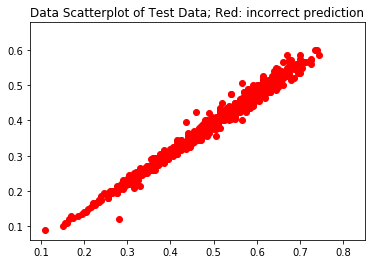

In [82]:
# Scikit learn classifier
# try out some different k here
model = KNeighborsClassifier(n_neighbors=20)
model.fit(train_data.values, train_labels.values.ravel())
test_predicted_labels = model.predict(test_data.values)

wrong_prediction = (test_predicted_labels != test_labels.values.ravel())

print('Number of incorrect predictions:', np.sum(wrong_prediction))

testCount = len(test_labels)
print('% Correct', (testCount - np.sum(wrong_prediction))/testCount )

plt.plot(train_data.values[:, 0], train_data.values[:, 1], 'wo')
plt.plot(train_data.values[np.where(wrong_prediction), 0][0], 
         train_data.values[np.where(wrong_prediction), 1][0], 'ro')
plt.title("Data Scatterplot of Test Data; Red: incorrect prediction")